In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

In [3]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['target']=diabetes.target

In [5]:
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [6]:
X = diabetes.data
y= diabetes.target

In [7]:
feature_for_3d = 'bmi'
feature_index = list(diabetes.feature_names).index(feature_for_3d)


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=.2)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [10]:
ridge_model = Ridge()

In [11]:
param_grid ={'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

In [12]:
grid_search = GridSearchCV(ridge_model,param_grid,cv=5)

In [13]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [14]:
best_alpha = grid_search.best_params_['alpha']
best_alpha

0.1

In [15]:
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [16]:
y_pred = best_model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
mean_squared_error(y_test,y_pred)

2856.4868876706537

In [19]:
import matplotlib.pyplot as plt

In [25]:
from mpl_toolkits.mplot3d import Axes3D

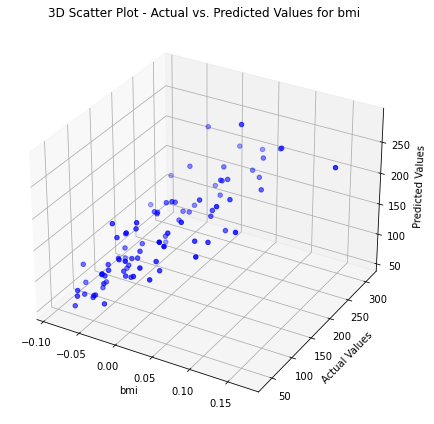

In [26]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, feature_index], y_test, y_pred, c='blue', marker='o', label='Actual vs. Predicted')
ax.set_xlabel(feature_for_3d)
ax.set_ylabel('Actual Values')
ax.set_zlabel('Predicted Values')
ax.set_title(f'3D Scatter Plot - Actual vs. Predicted Values for {feature_for_3d}')

plt.tight_layout()
plt.show()

AttributeError: 'Poly3DCollection' object has no attribute '_facecolors2d'

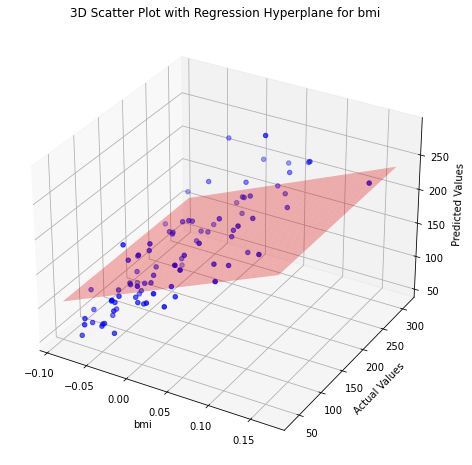

In [27]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter Plot - Actual vs. Predicted Values
ax.scatter(X_test[:, feature_index], y_test, y_pred, c='blue', marker='o', label='Actual vs. Predicted')

# Create a meshgrid for the hyperplane
x_range = np.linspace(min(X_test[:, feature_index]), max(X_test[:, feature_index]), 100)
y_range = np.linspace(min(y_test), max(y_test), 100)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)
Z_mesh = best_model.coef_[feature_index] * X_mesh + best_model.intercept_

# Plot the hyperplane (regression plane)
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, color='red', alpha=0.3, label='Regression Hyperplane')

ax.set_xlabel(feature_for_3d)
ax.set_ylabel('Actual Values')
ax.set_zlabel('Predicted Values')
ax.set_title(f'3D Scatter Plot with Regression Hyperplane for {feature_for_3d}')

plt.legend()
plt.tight_layout()
plt.show()